In [1]:
from google.colab import files
files.upload()  # Choose the zip file: air-quality-data-set.zip


Saving archive.zip to archive.zip


{'archive.zip': b'PK\x03\x04-\x00\x00\x00\x08\x00\x8ax\x98Q\xe3qt\xea\xff\xff\xff\xff\xff\xff\xff\xff\x0e\x00\x14\x00AirQuality.csv\x01\x00\x10\x00\xa9\xfa\x0b\x00\x00\x00\x00\x00\xbc\xde\x03\x00\x00\x00\x00\x00\x94\xbd\xcb\xcee;\x93\x1c67\xe0\xf7\xf8\x1b\xd8j\xf1~\xc1\x1e\t-@=\xb1\xdb\x90\xfa\x05<\xd0\xc0\x03\xcf<\xd0\xe3\x8b\x11\x91\xe4"\xb9vAe\xa0\xfb\xfc\xa7\xeaT\xe5\xc7\xc5K^##\xff\xf3\xff\xfd\xff\xfd\xf7\xef\xbf\xff?\xff\xef\x7f\xff\xfe\xcb\xbf\xfd\xe3\xbf\xfc\xfb?}\xff\xaf\x7fw\xed\x9f\xff\x9b\xff\xc7\xbf\xfc\xdb?}\xff\xcf\xff\xe3_\xff\x85\xbf\xf9/\xe5_\xcb\xf6_\xc3?\xf0_\xc6\x7f\xff\xb7\xff\xb1\xfdn\xfc\xc7\xf85~3l\xbf\x99\xc6o\x86\xf9\x8b\xfc\x8f\x7f\x8b\xff\xf4\xfd\xf7\xef\x7f\xfd\xd7\xef\x7f\xfa\xd7\xef\xf7\x7f\xff\xdf\xbc\xfb\x8f.\xfe\xc7\xe0\\\xfa\xfa\xf6\xcf\xce\x8d\xff\xfb\x86O\xf9\xfaX\xdc\xd7\xe7\xf1\xff\xfe\xd3\xbf\xde\xa5\xf1[e\xfc\xbf\xcb\xe3\x1f>\x8e_\xf4\xf0\xf5\xa1\xb4\xf1\'\xc7\x1fOm\xfc)\xf7\xa9\xb9\xb6[j\x9fR\xc7\x1f\xc7\xdf\xf1\xe1\xdb?\xe9\xdbs\x1e\xd2\x86 _

In [4]:
import zipfile

with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall()


In [5]:
!ls

AirQuality.csv	archive.zip  sample_data


In [7]:
import os

for root, dirs, files in os.walk("."):
    for file in files:
        print(os.path.join(root, file))


./AirQuality.csv
./archive.zip
./.config/.last_survey_prompt.yaml
./.config/.last_opt_in_prompt.yaml
./.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
./.config/gce
./.config/default_configs.db
./.config/.last_update_check.json
./.config/config_sentinel
./.config/active_config
./.config/configurations/config_default
./.config/logs/2025.06.23/13.37.33.586566.log
./.config/logs/2025.06.23/13.37.44.211435.log
./.config/logs/2025.06.23/13.36.59.539466.log
./.config/logs/2025.06.23/13.37.21.645147.log
./.config/logs/2025.06.23/13.37.31.575304.log
./.config/logs/2025.06.23/13.37.43.483451.log
./sample_data/README.md
./sample_data/anscombe.json
./sample_data/mnist_train_small.csv
./sample_data/mnist_test.csv
./sample_data/california_housing_test.csv
./sample_data/california_housing_train.csv


In [14]:
import pandas as pd

# Load the original file again
df = pd.read_csv("AirQuality.csv", sep=';', decimal=',', encoding='latin1')


In [9]:
# Check column names
df.columns


Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [15]:
df.drop(columns=["Unnamed: 15", "Unnamed: 16"], inplace=True)


In [16]:
df.columns = df.columns.str.strip()


In [17]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'],
                                format='%d/%m/%Y %H.%M.%S', errors='coerce')


In [18]:
df.drop(columns=['Date', 'Time'], inplace=True)


In [19]:
import numpy as np
df.replace(-200, np.nan, inplace=True)
df.dropna(thresh=5, inplace=True)


In [20]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 9017 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CO(GT)         7370 non-null   float64       
 1   PT08.S1(CO)    8991 non-null   float64       
 2   NMHC(GT)       913 non-null    float64       
 3   C6H6(GT)       8991 non-null   float64       
 4   PT08.S2(NMHC)  8991 non-null   float64       
 5   NOx(GT)        7422 non-null   float64       
 6   PT08.S3(NOx)   8991 non-null   float64       
 7   NO2(GT)        7419 non-null   float64       
 8   PT08.S4(NO2)   8991 non-null   float64       
 9   PT08.S5(O3)    8991 non-null   float64       
 10  T              8991 non-null   float64       
 11  RH             8991 non-null   float64       
 12  AH             8991 non-null   float64       
 13  Datetime       9017 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(13)
memory usage: 1.0 MB


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00


<Figure size 1400x600 with 0 Axes>

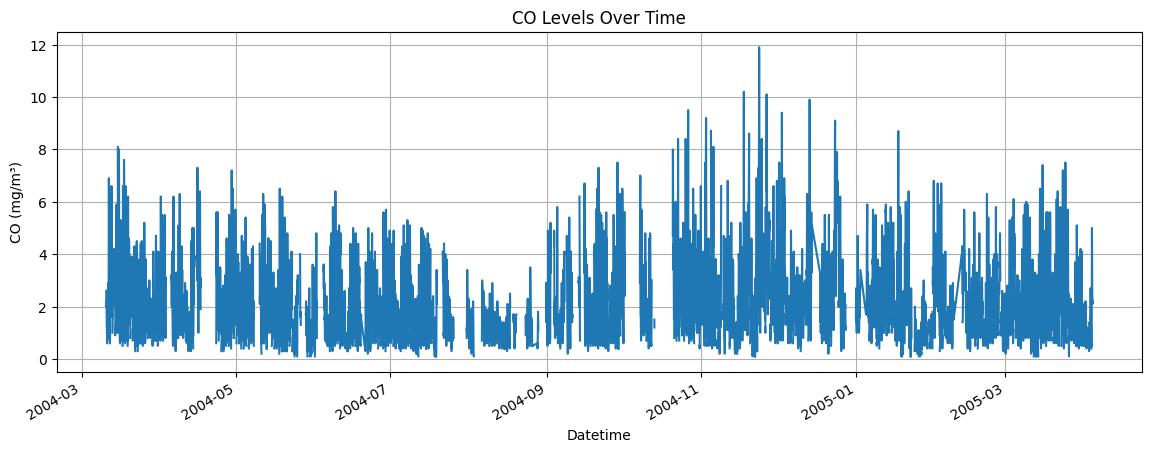

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
df.plot(x='Datetime', y='CO(GT)', title='CO Levels Over Time', figsize=(14,5), legend=False)
plt.ylabel("CO (mg/m³)")
plt.grid(True)
plt.show()


<Axes: title={'center': 'Benzene (C6H6) Over Time'}, xlabel='Datetime'>

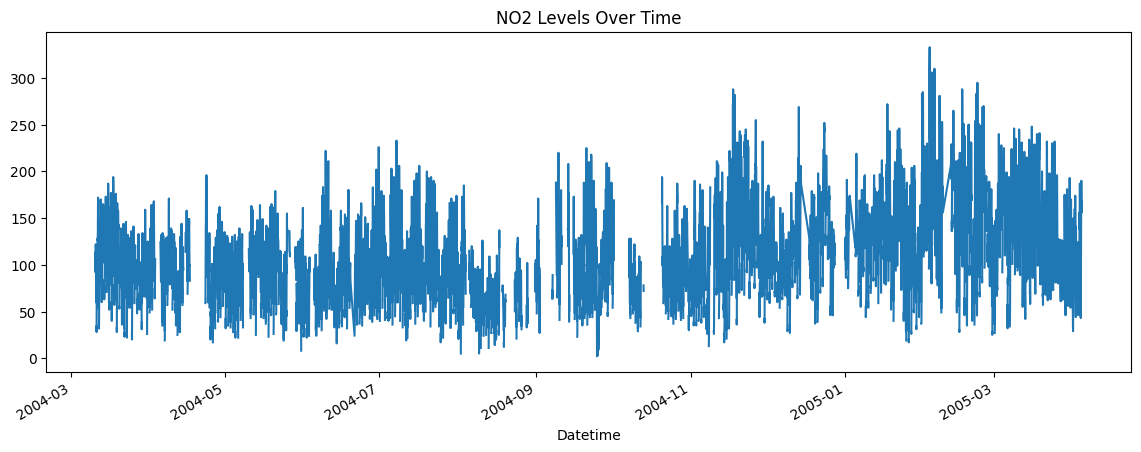

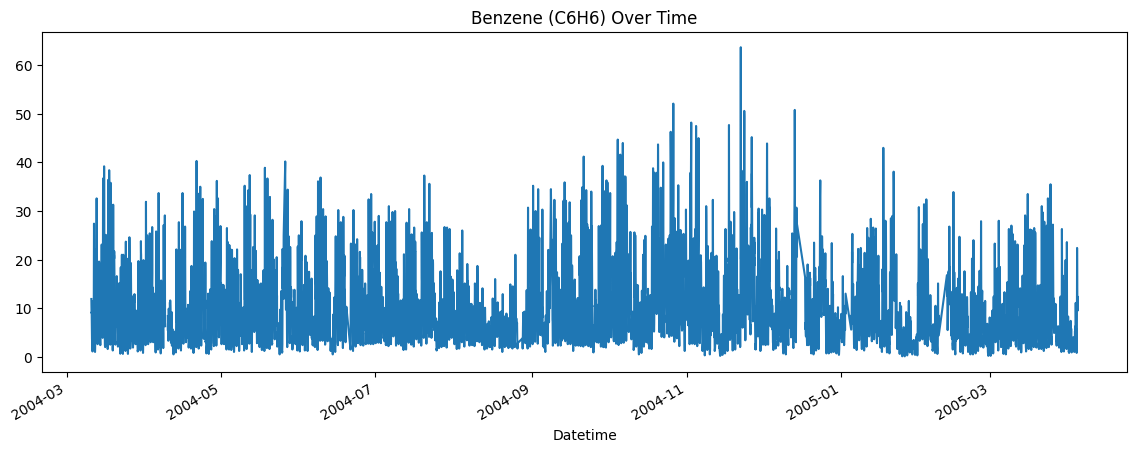

In [22]:
df.plot(x='Datetime', y='NO2(GT)', title='NO2 Levels Over Time', figsize=(14,5), legend=False)
df.plot(x='Datetime', y='C6H6(GT)', title='Benzene (C6H6) Over Time', figsize=(14,5), legend=False)


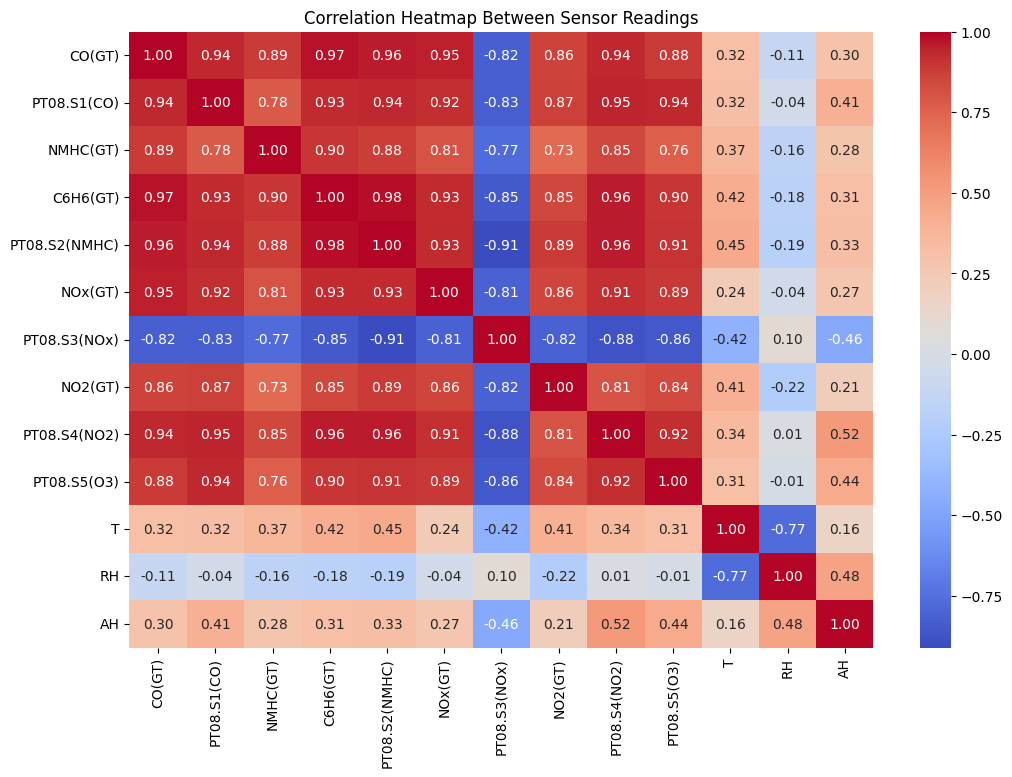

In [23]:
import seaborn as sns

# Drop non-numeric and datetime columns
corr_df = df.drop(columns=['Datetime']).dropna()

# Plot correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap Between Sensor Readings")
plt.show()


In [24]:
df.isnull().sum().sort_values(ascending=False)


,0
NMHC(GT),8104
CO(GT),1647
NO2(GT),1598
NOx(GT),1595
C6H6(GT),26
PT08.S1(CO),26
PT08.S2(NMHC),26
PT08.S3(NOx),26
PT08.S4(NO2),26
PT08.S5(O3),26


In [25]:
# Drop rows with missing values for simplicity
df_model = df.dropna()

# Define features (X) and target (y)
X = df_model.drop(columns=['CO(GT)', 'Datetime'])
y = df_model['CO(GT)']


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
import numpy as np
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

print("R² Score:", r2_score(y_test, y_pred))


RMSE: 0.2537964628955914
R² Score: 0.969056876059611


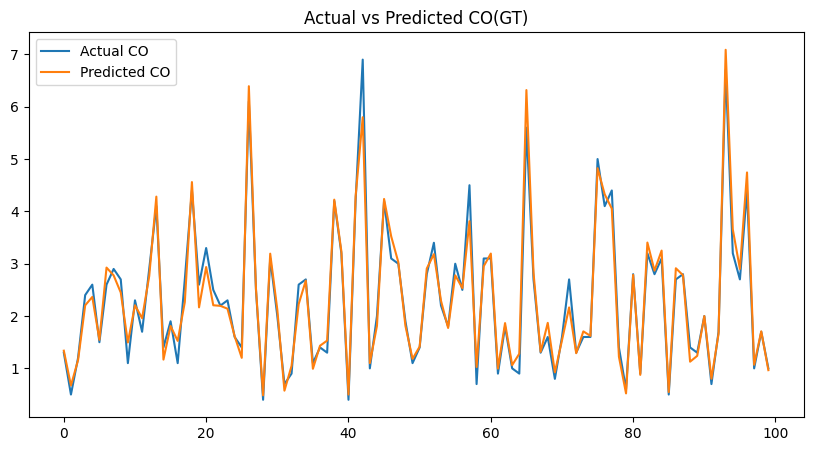

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label='Actual CO')
plt.plot(y_pred[:100], label='Predicted CO')
plt.title("Actual vs Predicted CO(GT)")
plt.legend()
plt.show()


In [30]:
!pip install prophet
from prophet import Prophet


In [31]:
# Use CO(GT) for forecasting
df_prophet = df[['Datetime', 'CO(GT)']].dropna()

# Rename columns for Prophet
df_prophet = df_prophet.rename(columns={'Datetime': 'ds', 'CO(GT)': 'y'})
df_prophet.head()


,ds,y
0,2004-03-10 18:00:00,2.6
1,2004-03-10 19:00:00,2.0
2,2004-03-10 20:00:00,2.2
3,2004-03-10 21:00:00,2.2
4,2004-03-10 22:00:00,1.6


In [32]:
model = Prophet()
model.fit(df_prophet)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpws6sowa5/4ceuxbnk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpws6sowa5/ubihefea.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95597', 'data', 'file=/tmp/tmpws6sowa5/4ceuxbnk.json', 'init=/tmp/tmpws6sowa5/ubihefea.json', 'output', 'file=/tmp/tmpws6sowa5/prophet_modelinop00tf/prophet_model-20250625054042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:40:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:40:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [35]:
future = model.make_future_dataframe(periods=48, freq='h')


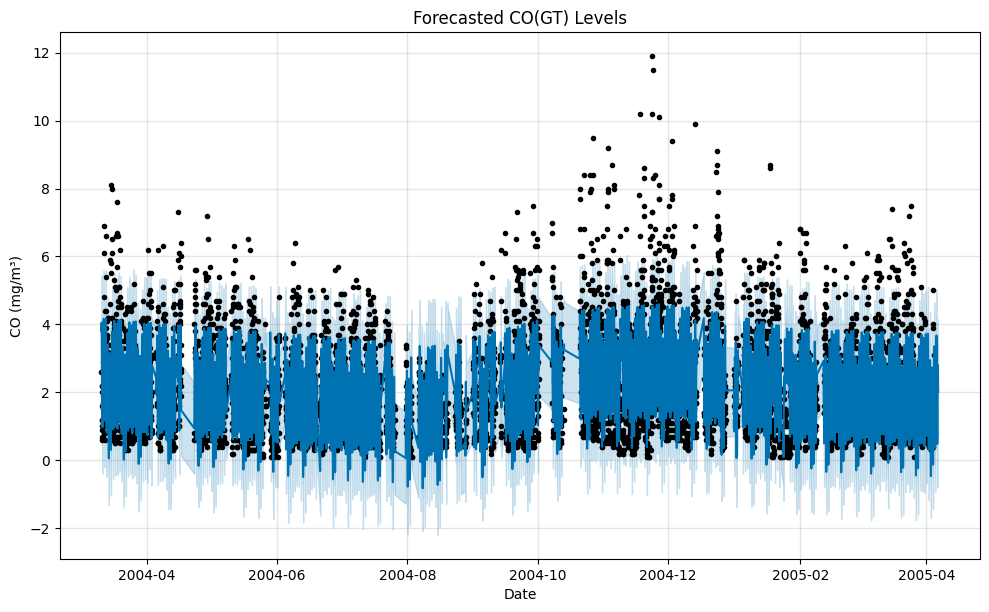

In [36]:
model.plot(forecast)
plt.title("Forecasted CO(GT) Levels")
plt.xlabel("Date")
plt.ylabel("CO (mg/m³)")
plt.show()


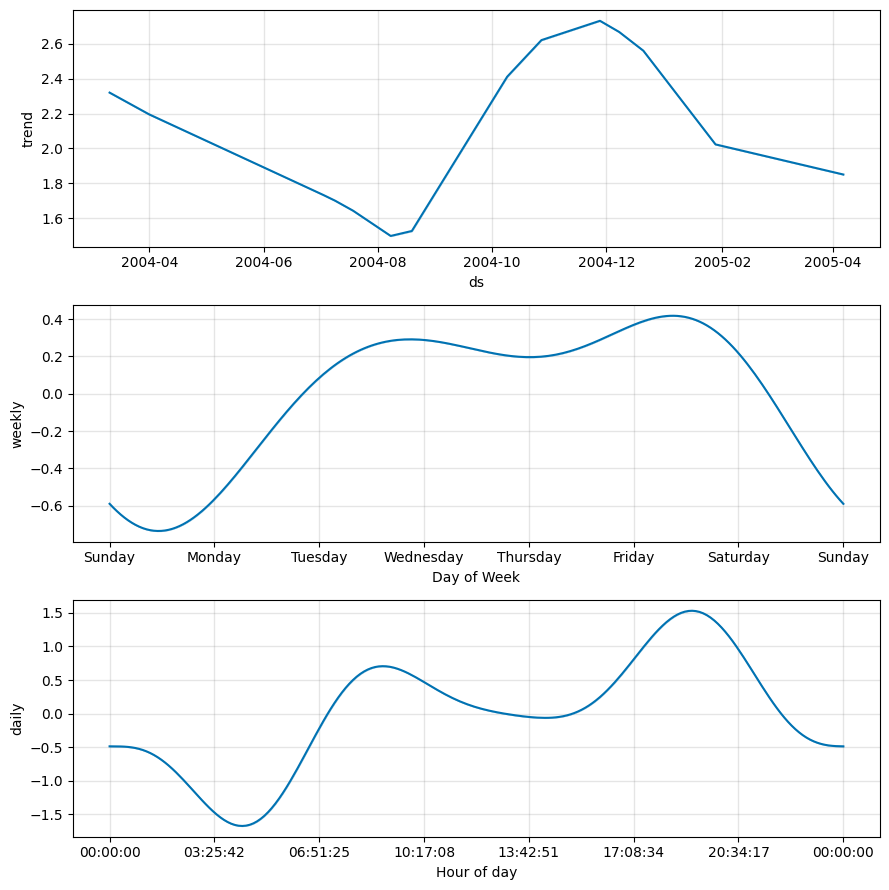

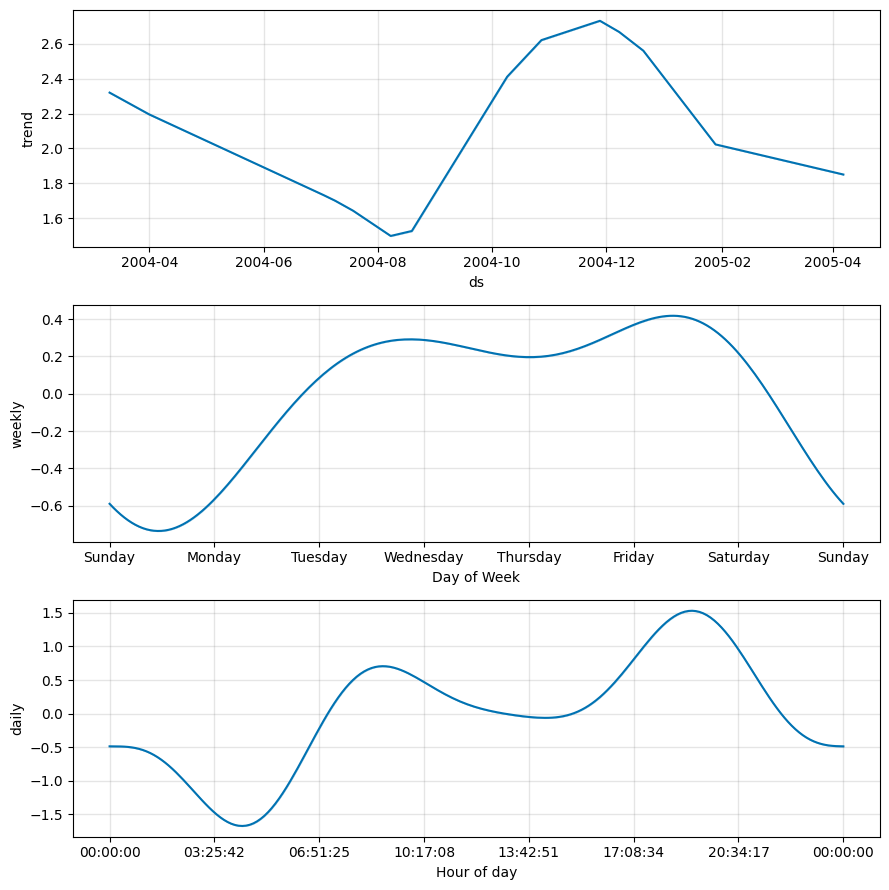

In [37]:
model.plot_components(forecast)


In [38]:
threshold = 2.0


In [39]:
# Only look at future predictions (not past data)
future_alerts = forecast[forecast['ds'] > df_prophet['ds'].max()]

# Find times where predicted CO exceeds threshold
alerts = future_alerts[future_alerts['yhat'] > threshold]
alerts = alerts[['ds', 'yhat']]  # Keep only date and predicted CO


In [40]:
if not alerts.empty:
    print("⚠️ ALERT: Unsafe CO(GT) Levels Predicted")
    for index, row in alerts.iterrows():
        print(f"{row['ds']:%d %b %Y %I:%M %p} → CO: {row['yhat']:.2f} mg/m³")
else:
    print("✅ No unsafe CO levels predicted in the next 48 hours.")


⚠️ ALERT: Unsafe CO(GT) Levels Predicted
04 Apr 2005 05:00 PM → CO: 2.50 mg/m³
04 Apr 2005 06:00 PM → CO: 3.07 mg/m³
04 Apr 2005 07:00 PM → CO: 3.36 mg/m³
04 Apr 2005 08:00 PM → CO: 3.14 mg/m³
04 Apr 2005 09:00 PM → CO: 2.53 mg/m³
05 Apr 2005 08:00 AM → CO: 2.59 mg/m³
05 Apr 2005 09:00 AM → CO: 2.79 mg/m³
05 Apr 2005 10:00 AM → CO: 2.64 mg/m³
05 Apr 2005 11:00 AM → CO: 2.39 mg/m³
05 Apr 2005 12:00 PM → CO: 2.21 mg/m³
05 Apr 2005 01:00 PM → CO: 2.11 mg/m³
05 Apr 2005 02:00 PM → CO: 2.07 mg/m³
05 Apr 2005 03:00 PM → CO: 2.11 mg/m³
05 Apr 2005 04:00 PM → CO: 2.37 mg/m³
05 Apr 2005 05:00 PM → CO: 2.86 mg/m³
05 Apr 2005 06:00 PM → CO: 3.41 mg/m³
05 Apr 2005 07:00 PM → CO: 3.68 mg/m³
05 Apr 2005 08:00 PM → CO: 3.43 mg/m³
05 Apr 2005 09:00 PM → CO: 2.80 mg/m³
05 Apr 2005 10:00 PM → CO: 2.12 mg/m³
06 Apr 2005 07:00 AM → CO: 2.01 mg/m³
06 Apr 2005 08:00 AM → CO: 2.63 mg/m³
06 Apr 2005 09:00 AM → CO: 2.81 mg/m³
06 Apr 2005 10:00 AM → CO: 2.64 mg/m³
06 Apr 2005 11:00 AM → CO: 2.37 mg/m³
06 Apr 20

In [41]:
from google.colab import files
files.upload()  # Then select your water-potability.zip file


Saving waterquality.zip to waterquality.zip


{'waterquality.zip': b'PK\x03\x04-\x00\x00\x00\x08\x00wS\x99R\xd4\x82\x11\xcd\xff\xff\xff\xff\xff\xff\xff\xff\x14\x00\x14\x00water_potability.csv\x01\x00\x10\x00\x83\x03\x08\x00\x00\x00\x00\x00\'\xea\x03\x00\x00\x00\x00\x00L\xddK\xaf4]v\x1c\xe6\xb9\x00\xfd\x93B!\xaf;s\x8f5\xf1\xcc\x06\xa4\xb9\xd1\x12i\xb3\x01\x8a4(\xca\x80\xff\xbd\xe3\x89]\xefg\xb3\x1b\xec\xee\xf3\x9dS\x95\xb9/\xeb\x12+V\xac\xff\xeb\x9f>\xff\xcb\xdf\xfe\xed\x1f\xfe\xe5\x1f\xff\xc7\xff\xf8\xfc\xe7\x7f\xfd\xe7\xbf\xff\xc3\xff\xf8\xfc\xa7\x7f\xfa\xe7\x7f\xfd\xb7\xbf\xfd\xf7\xbf\xe7g\x9f\xff\xfc?\xff\xf9\xff\xf8\xdb\xbf\xff\xe3\xe7?\xfd\xeb\xbf\xfc\xc3\xff\xfco\xff\xfe\xf7\xff\xfb\xef\xff\xfe\xff|\xfe\xd7\x7f\xfb?\xff\xf6/\x7f\xffo\xff\xfb\x7f\xfb\xdb\xbf\xfd\xd7\x7f\xfd\x97\xcf\x7f\xf9\xb7\xbf\xff\xd3\xdf\xfe\xf9_\xff\xfb?\xfe\xfb?\xfd\xcd\xdf\xfc\x97\xff\xf9o\xff\xf5\xef\xff\xe0\x17\xff\xb7\x7f\xfd\xf7\xbf\xfd\xd7\xbf\xffs\xfe\xeb\x7f\xfc\x0f\x9fc\xbb\xbe\xef\xdc\xae\xfb\xbe\x9e\xfd<\xc7\x99\x9f<s\xff\x9e\xfb;\xdf\xed\xb

In [42]:
import zipfile

with zipfile.ZipFile("waterquality.zip", 'r') as zip_ref:
    zip_ref.extractall()


In [43]:
import pandas as pd

df_water = pd.read_csv("water_potability.csv")
df_water.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [44]:
# Check for null values
df_water.isnull().sum()


,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [45]:
# Fill missing values with column means
df_water.fillna(df_water.mean(), inplace=True)

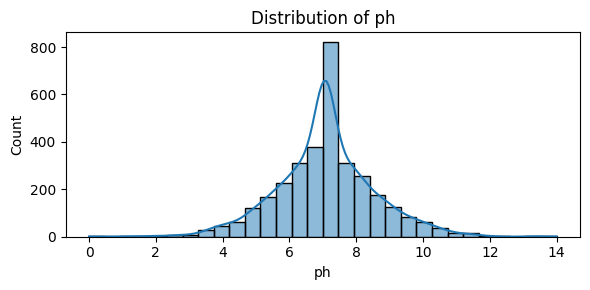

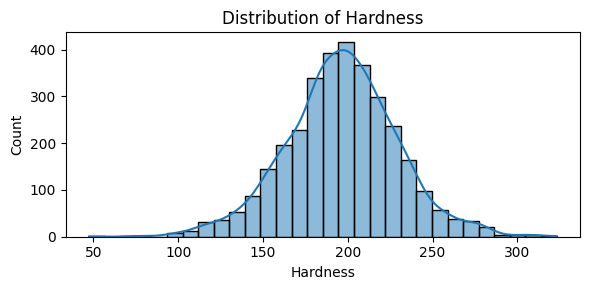

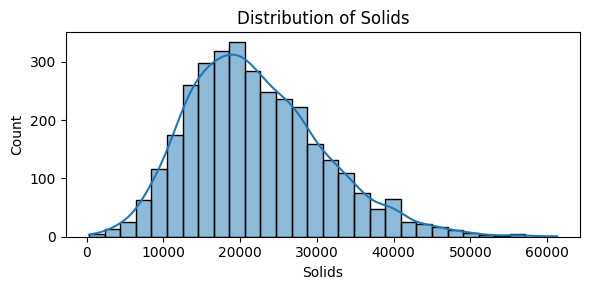

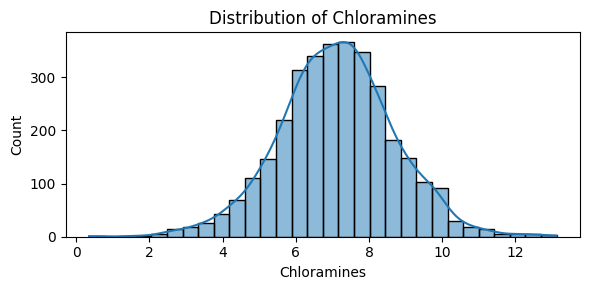

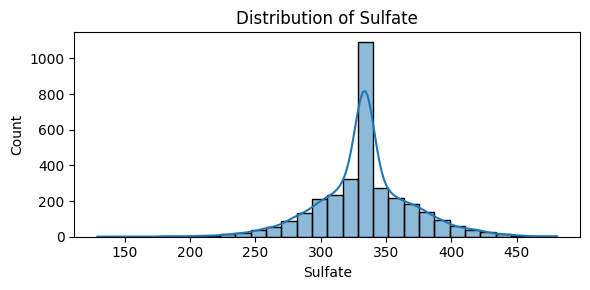

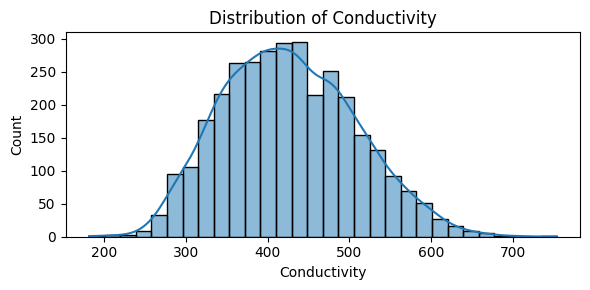

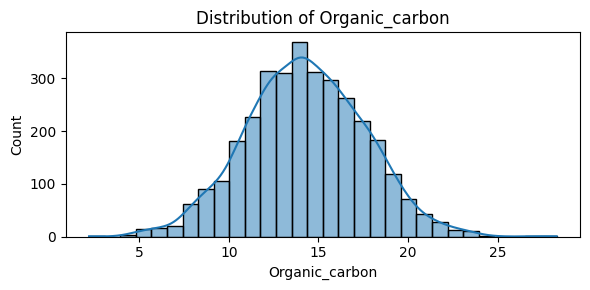

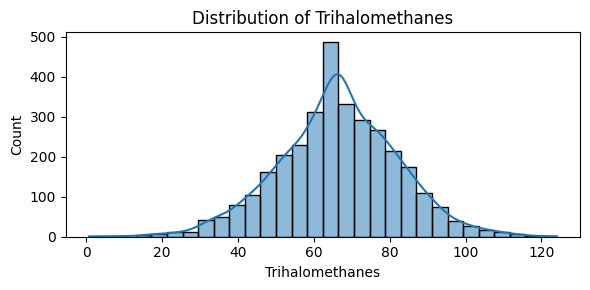

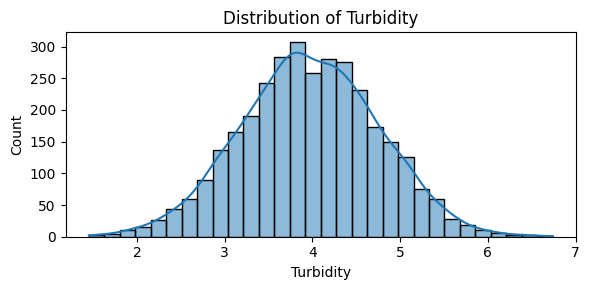

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

features = df_water.columns[:-1]  # exclude Potability
for feature in features:
    plt.figure(figsize=(6, 3))
    sns.histplot(df_water[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()


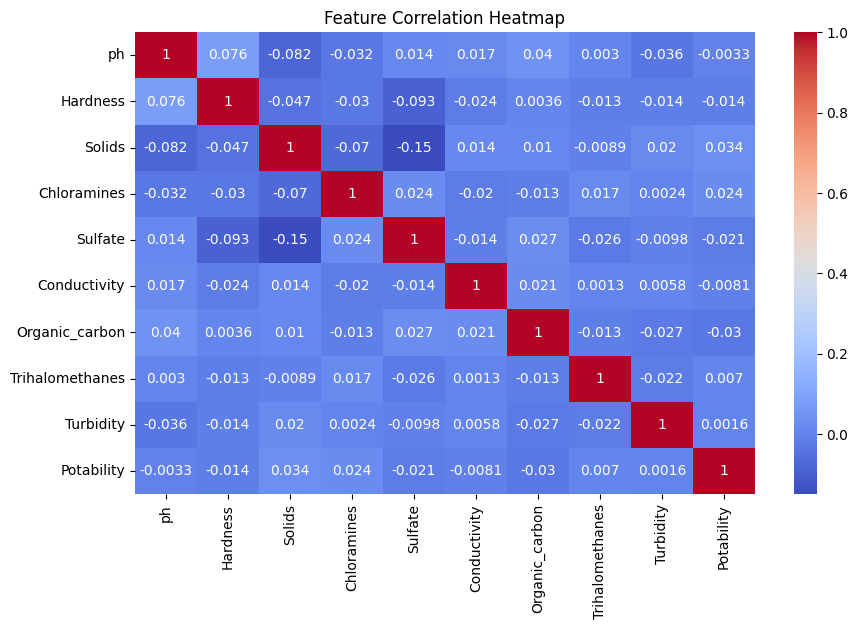

In [49]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_water.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


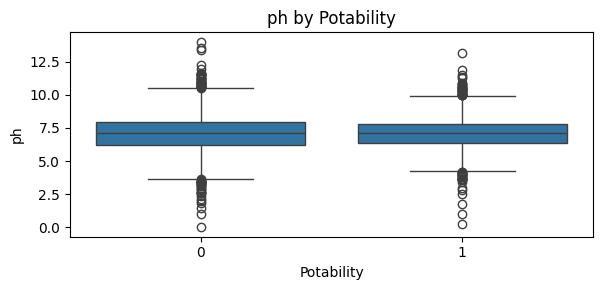

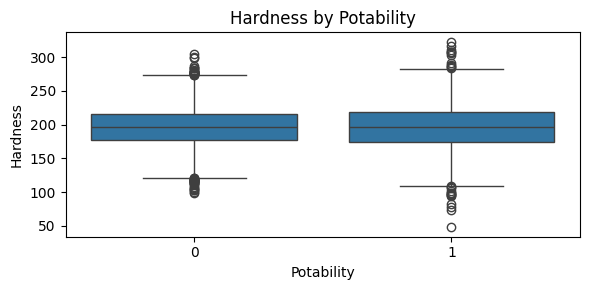

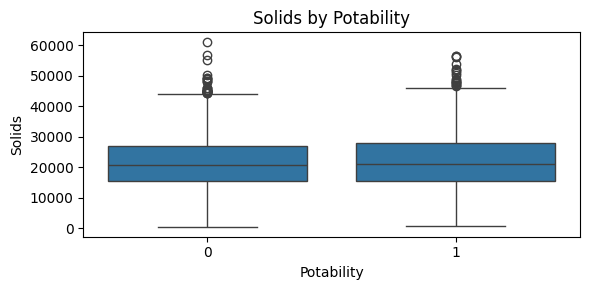

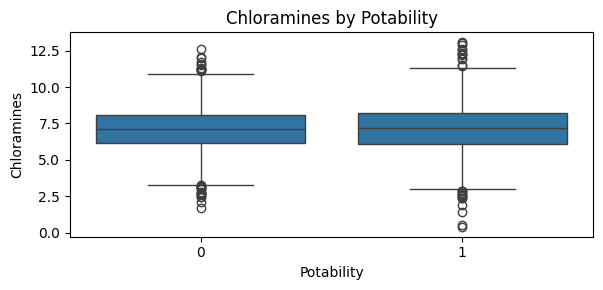

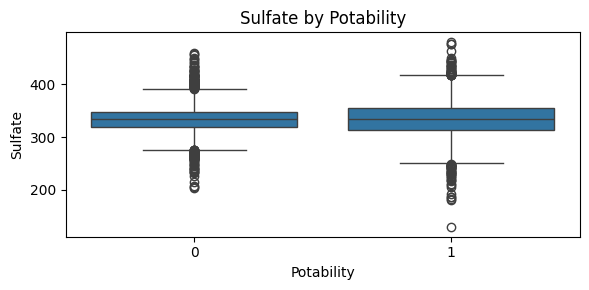

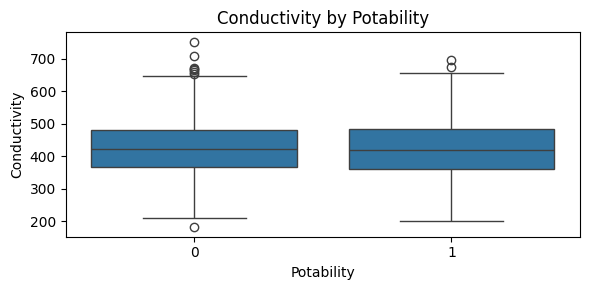

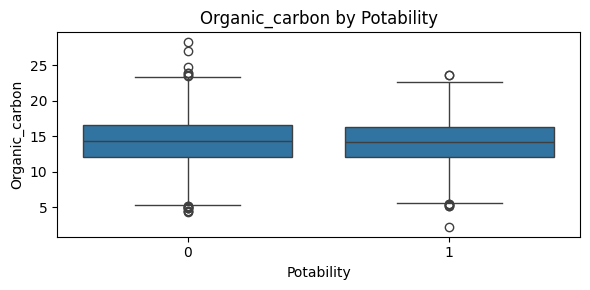

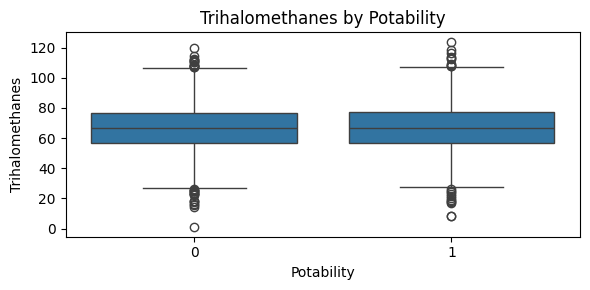

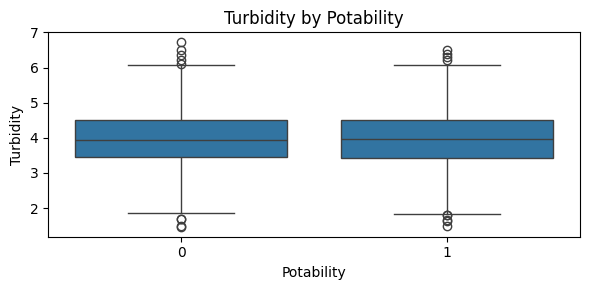

In [50]:
for feature in features:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x='Potability', y=feature, data=df_water)
    plt.title(f'{feature} by Potability')
    plt.tight_layout()
    plt.show()

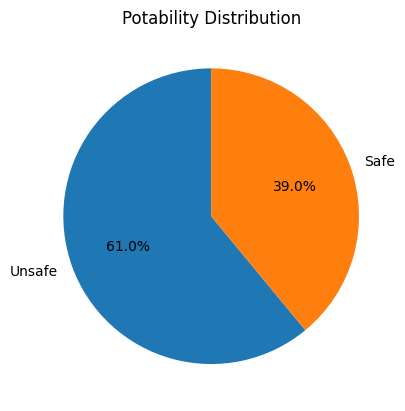

In [51]:
df_water['Potability'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Unsafe', 'Safe'], startangle=90)
plt.title("Potability Distribution")
plt.ylabel("")
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Features and label
X = df_water.drop('Potability', axis=1)
y = df_water['Potability']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.86      0.77       412
           1       0.61      0.38      0.47       244

    accuracy                           0.68       656
   macro avg       0.65      0.62      0.62       656
weighted avg       0.67      0.68      0.66       656



In [47]:
# Predict probability of being unsafe (Potability = 0)
unsafe_prob = clf.predict_proba(X_test)[:, 0]
alert_indices = unsafe_prob > 0.85

if alert_indices.any():
    print("⚠️ ALERT: High chance of unsafe water samples detected:")
    print(X_test[alert_indices].head())
else:
    print("✅ No unsafe water predicted with high confidence.")


⚠️ ALERT: High chance of unsafe water samples detected:
            ph    Hardness        Solids  Chloramines     Sulfate  \
557   9.515141  199.081317   9082.816175     5.976550  367.230792   
17    9.181560  273.813807  24041.326280     6.904990  398.350517   
1397  4.562156  189.261418  23829.792880     7.815125  325.167371   
1381  9.502857  175.585673   4466.257488     6.416459  370.851893   
1351  8.647454  183.597374  12995.885427     6.195449  382.357869   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
557     501.446834       12.877123        55.770690   3.812888  
17      477.974642       13.387341        71.457362   4.503661  
1397    401.551657       13.624148        66.396293   4.822884  
1381    406.309854       13.754221        57.438275   4.237345  
1351    489.762799       18.076963        93.409614   3.624101  
